In [4]:
import cv2
import numpy as np
import glob
import os

# Path to base fingerprints folder
base_path = r"C:\Users\shrut\OneDrive\Desktop\archive (1)\fingerprints"

# Find all Db folders (Db1_B, Db2_A, etc.)
db_folders = sorted(glob.glob(os.path.join(base_path, "Db*")))

# Function to crop gray borders
def crop_image_from_gray(img):
    if len(img.shape) == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img
    mask = gray > 10
    if mask.any():
        img = img[np.ix_(mask.any(1), mask.any(0))]
    return img

# Process single image
def process_image(path):
    img = cv2.imread(path)
    img = crop_image_from_gray(img)
    img = cv2.resize(img, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img / 255.0
    img = np.expand_dims(img, axis=-1)
    return img

# Add noise
def add_noise(image, stage):
    noise_factors = {1: 0.1, 2: 0.2, 3: 0.3, 4: 0.3}
    noise = np.random.normal(0, 1, image.shape)
    noisy_image = image + noise_factors[stage] * noise

    if stage == 4:
        noisy_image = cv2.GaussianBlur(noisy_image.squeeze(), (5, 5), 0)
        noisy_image = np.expand_dims(noisy_image, axis=-1)

    noisy_image = np.clip(noisy_image, 0, 1)
    return noisy_image

# Main logic: take 10 images from each Db and apply noise
all_noisy_images = []

for db_folder in db_folders:
    tif_images = sorted(glob.glob(os.path.join(db_folder, "*.tif")))
    selected_images = tif_images[:10]  # Take first 10 images from this DB

    for path in selected_images:
        img = process_image(path)
        noisy_img = add_noise(img, stage=3)
        all_noisy_images.append(noisy_img)

noisy_images_array = np.array(all_noisy_images)
print(f"✅ Final noisy image set shape: {noisy_images_array.shape}")


✅ Final noisy image set shape: (40, 128, 128, 1)


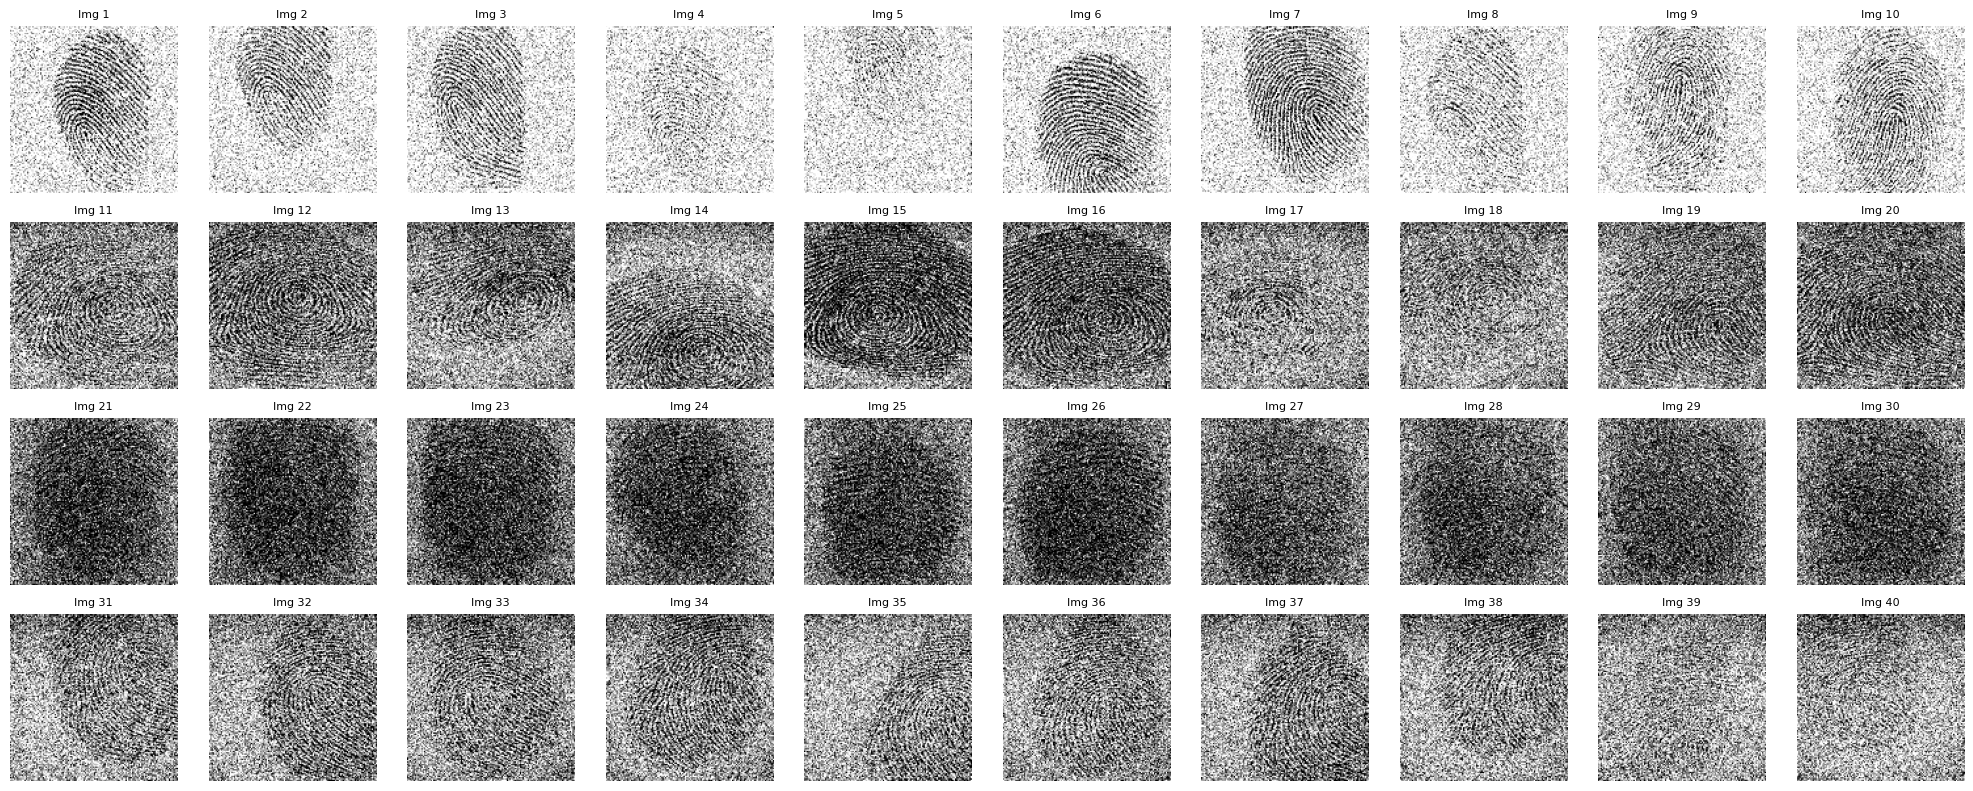

In [5]:
import matplotlib.pyplot as plt

# Plot all 40 images in a 4x10 grid
plt.figure(figsize=(20, 8))
for i in range(40):
    plt.subplot(4, 10, i + 1)
    plt.imshow(noisy_images_array[i].squeeze(), cmap='gray')
    plt.axis('off')
    plt.title(f"Img {i+1}", fontsize=8)
plt.tight_layout()
plt.show()


In [7]:
import os
import cv2

# Define output folder path
output_folder = r"C:\Users\shrut\OneDrive\Desktop\noisy"
os.makedirs(output_folder, exist_ok=True)

# Save each image as .tif
for i, img in enumerate(noisy_images_array):
    # Convert from float [0,1] to uint8 [0,255]
    img_to_save = (img.squeeze() * 255).astype(np.uint8)
    filename = f"noisy_img_{i+1:02d}.tif"
    save_path = os.path.join(output_folder, filename)
    cv2.imwrite(save_path, img_to_save)

print(f"✅ All 40 noisy images saved as .tif in: {output_folder}")


✅ All 40 noisy images saved as .tif in: C:\Users\shrut\OneDrive\Desktop\noisy
